* Name : Joonyoung-Choi
* Student ID: 20112096
* Description: polynomial fitting with regularization
* github: https://github.com/mydream757/Computer_Vision

1. Import libraries

* import needed libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg

2. Define functions

* make the clean data

In [2]:
def fun(x):

    # f = np.sin(x) * (1 / (1 + np.exp(-x)))
    f = np.abs(x) * np.sin(x)
    return f

* create matrices of 'A' and 'b'

In [3]:
def create_A(p, x, l):
    A = np.ones((x.shape))
    for i in range(p+1):
        if i != 0:
            A = np.vstack((A,pow(x,i)))
    A = A.T
    return A
def create_B(n,l,y):
    b = y.reshape((n,1))
    return b

* make a eigen matrix.

In [4]:
def make_l(p):
    e = np.eye(p+1)
    e[0][0] = 0
    return e

* compute polynomial using coefficient

In [5]:
def polyFunc(c,x):
    y = np.zeros(x.shape)

    for i in range(c.size):
        y = y + c[i]*pow(x,i)
    return y

3. set the data

* make the clean data and the noisy data

In [6]:
num     = 1001
std     = 5

# x  : x-coordinate data
# y1 : (clean) y-coordinate data
# y2 : (noisy) y-coordinate data


n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x) # clean points
y2      = y1 + nn * std	# noisy points

* this is a container of optimal sets

In [7]:
result_c = []
result = np.zeros((10,num))
result_e = np.zeros((10,1))

4. compute coefficient and show the results

* show the lamda changing when p is fixed and varing p

P:  8


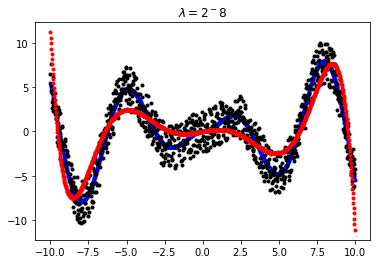

P:  8


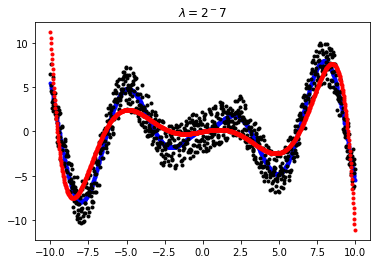

P:  8


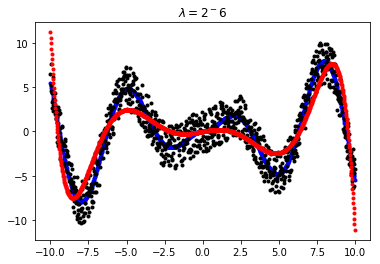

P:  8


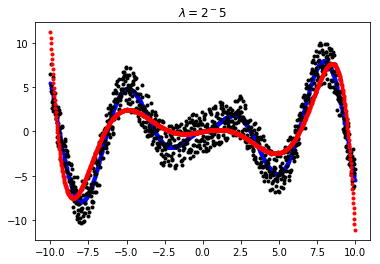

P:  8


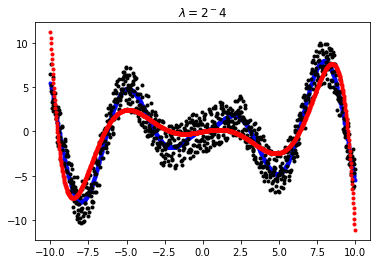

P:  8


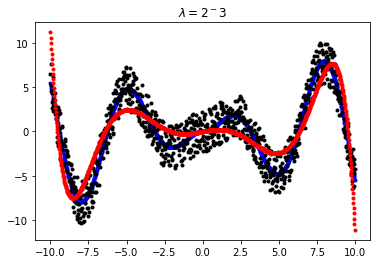

P:  8


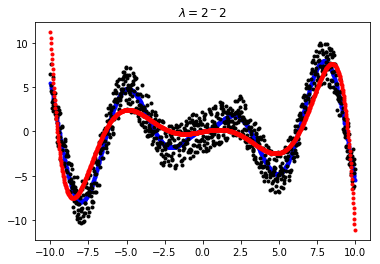

P:  8


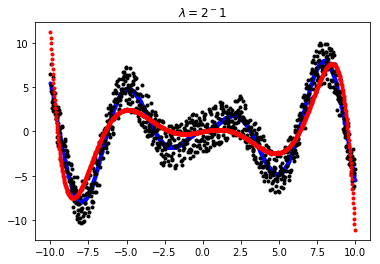

P:  8


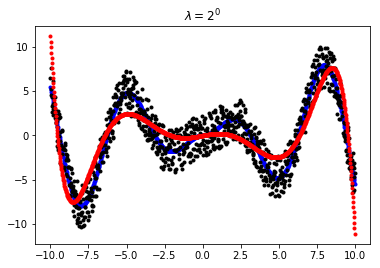

P:  8


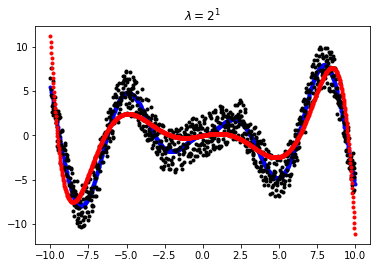

P:  8


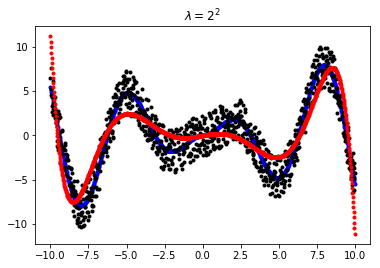

P:  8


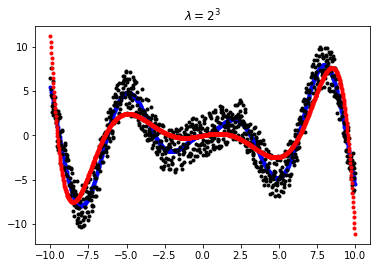

P:  8


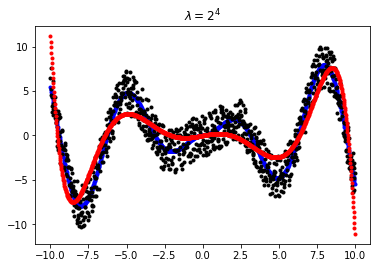

P:  8


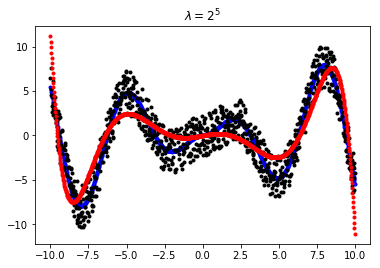

P:  8


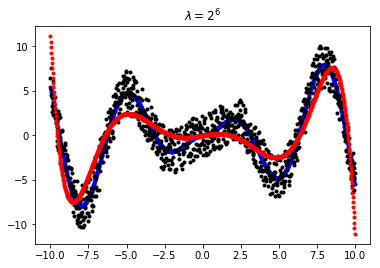

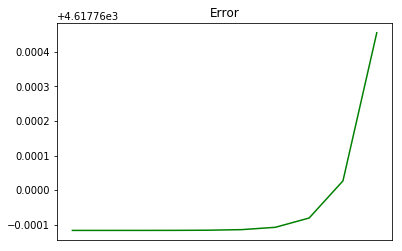

In [8]:
for i in range(10):
    p = i+6         # p is 6 to 15
    
    for k in range(15):
        l = pow(2,k-8) #  lambda = pow(2,-8) to pow(2,6)
        
        
        A = create_A(p,x,l)
        b = create_B(num,l,y2)
        # the
        rA = np.concatenate((A,np.sqrt(l)*make_l(p)),axis=0)
        rb = np.concatenate((b,np.zeros(p+1).reshape((p+1,1))),axis=0)
        
        rATA = np.dot(rA.T,rA)
        inverse = linalg.inv(rATA)
        coeff = np.dot(np.dot(inverse,rA.T),rb)
        
        y3 = np.dot(A,coeff)
        r = np.dot(A,coeff) - b
        energy = np.dot(r.T,r)
        if i==2:
            print('P: ', p)
            #plot the varing lambda when p is fixed
            result_e[k:,0] = energy
            plt.title(r'$\lambda=2^%d$' %(k-8))
            plt.plot(x,y1,'b.', label = 'clean')
            plt.plot(x,y2,'k.', label = 'noisy')
            plt.plot(x,y3,'r.', label = 'poly fit with lambda')
        plt.show()
        if k==0:
            temp = energy
            result[i,] = y3.reshape((1001))
            result_c.append(coeff)
        elif temp>energy:
            result[i,] = y3.reshape((1001))
            result_c.append(coeff)
            temp = energy
    
    if i==2:
        fig = plt.figure()
        ax =[1,2,3,4,5,6,7,8,9,10]
        result_e.reshape((10,1))
        plt.plot(ax,result_e.reshape((10,1)),'g-')
        plt.title('Error')
        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        #frame.axes.get_yaxis().set_visible(False)
        plt.show()

* optimal sets I found when p is from 6 to 15

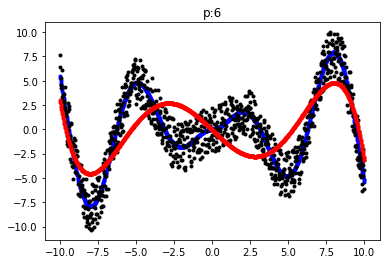

coefficients
[[-6.14232481e-02]
 [-1.48540601e+00]
 [-2.02124907e-04]
 [ 6.89243990e-02]
 [ 1.24849795e-04]
 [-5.71532826e-04]
 [-1.27004342e-06]]


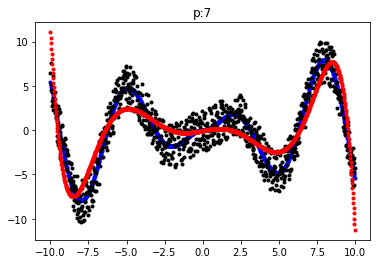

coefficients
[[-6.14232481e-02]
 [ 3.27685350e-01]
 [-2.02124907e-04]
 [-9.39309382e-02]
 [ 1.24849795e-04]
 [ 3.00418766e-03]
 [-1.27004342e-06]
 [-2.20915311e-05]]


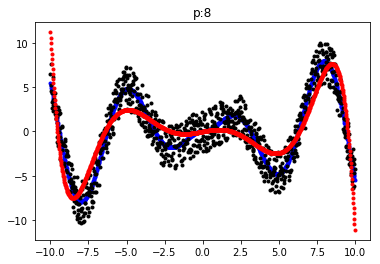

coefficients
[[-2.36538705e-02]
 [ 3.27685350e-01]
 [-1.37722636e-02]
 [-9.39309382e-02]
 [ 8.69733159e-04]
 [ 3.00418766e-03]
 [-1.41558336e-05]
 [-2.20915311e-05]
 [ 6.88944736e-08]]


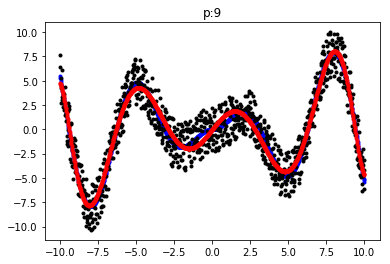

coefficients
[[-2.36538705e-02]
 [ 1.97805559e+00]
 [-1.37722636e-02]
 [-3.35509361e-01]
 [ 8.69733159e-04]
 [ 1.24071959e-02]
 [-1.41558336e-05]
 [-1.56155489e-04]
 [ 6.88944737e-08]
 [ 6.31831151e-07]]


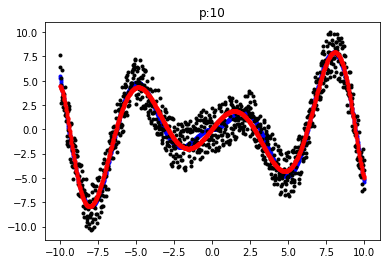

coefficients
[[ 5.95497500e-02]
 [ 1.97805559e+00]
 [-5.94445390e-02]
 [-3.35509361e-01]
 [ 4.82022940e-03]
 [ 1.24071959e-02]
 [-1.32437970e-04]
 [-1.56155489e-04]
 [ 1.50235481e-06]
 [ 6.31831151e-07]
 [-6.04048493e-09]]


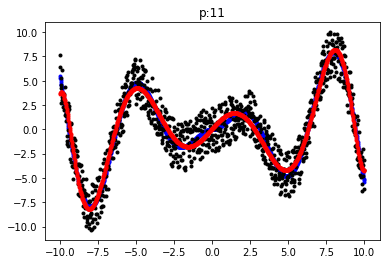

coefficients
[[ 5.95497500e-02]
 [ 1.74712679e+00]
 [-5.94445390e-02]
 [-2.85572347e-01]
 [ 4.82022940e-03]
 [ 9.41682967e-03]
 [-1.32437970e-04]
 [-8.36743804e-05]
 [ 1.50235481e-06]
 [-1.31749155e-07]
 [-6.04048493e-09]
 [ 2.90977520e-09]]


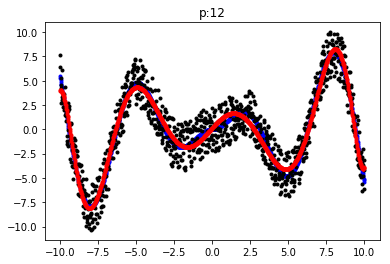

coefficients
[[ 1.39017592e-01]
 [ 1.74712679e+00]
 [-1.21308970e-01]
 [-2.85572347e-01]
 [ 1.25382309e-02]
 [ 9.41682967e-03]
 [-4.81639036e-04]
 [-8.36743805e-05]
 [ 8.59723003e-06]
 [-1.31749155e-07]
 [-7.21301101e-08]
 [ 2.90977520e-09]
 [ 2.29862609e-10]]


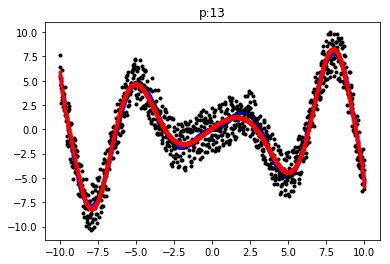

coefficients
[[ 1.39017587e-01]
 [ 1.12721255e+00]
 [-1.21308967e-01]
 [-9.99569883e-02]
 [ 1.25382305e-02]
 [-6.32993154e-03]
 [-4.81639018e-04]
 [ 4.85103473e-04]
 [ 8.59722969e-06]
 [-1.00660423e-05]
 [-7.21301069e-08]
 [ 8.58351816e-08]
 [ 2.29862598e-10]
 [-2.65269812e-10]]


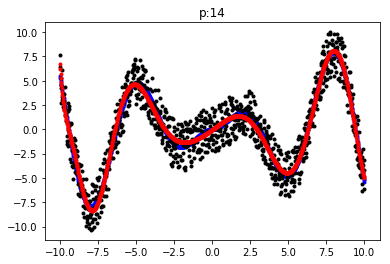

coefficients
[[-4.39434506e-02]
 [ 1.12721254e+00]
 [ 7.04306740e-02]
 [-9.99569861e-02]
 [-1.99946842e-02]
 [-6.32993171e-03]
 [ 1.57480295e-03]
 [ 4.85103479e-04]
 [-5.29768709e-05]
 [-1.00660424e-05]
 [ 8.70181051e-07]
 [ 8.58351825e-08]
 [-6.89504835e-09]
 [-2.65269814e-10]
 [ 2.10989203e-11]]


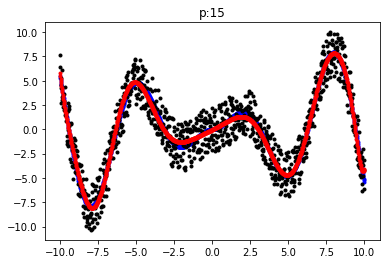

coefficients
[[-4.39435413e-02]
 [ 7.96280697e-01]
 [ 7.04307674e-02]
 [ 3.10624511e-02]
 [-1.99946994e-02]
 [-2.12375501e-02]
 [ 1.57480388e-03]
 [ 1.22905442e-03]
 [-5.29768982e-05]
 [-2.90416012e-05]
 [ 8.70181461e-07]
 [ 3.44095246e-07]
 [-6.89505140e-09]
 [-2.04978305e-09]
 [ 2.10989292e-11]
 [ 4.91916231e-12]]


In [13]:
for i in range(10):
    p = i+6
    plt.title('p:%d' %p)
    plt.plot(x,y1,'b.', label = 'clean')
    plt.plot(x,y2,'k.', label = 'noisy')
    plt.plot(x,result[i,],'r.', label = 'poly fit with l')
    plt.show()
    print('coefficients')
    print(result_c[i])